## Retrieve weather data from open meteo
For more information: https://open-meteo.com/

In [1]:
# Import the function to fetch weather data from the Open Meteo API utilities module.
from utils.openmeteo_utils import fetch_weather_data

# Import functions related to MTBS (Monitoring Trends in Burn Severity) analysis from the MTBS utilities module.
from utils.mtbs_utils import (
    initialize_gee,           
    get_mtbs_properties,      
    unix_to_date,             
    get_month_start_end,      
    get_event_start_end       
)

import pandas as pd
import matplotlib.pyplot as plt

### If you want to choose More Weather Variables from Open-Meteo

 Follow these steps:

1. **Visit the Open-Meteo API Page**:  
   Go to [Open-Meteo](https://open-meteo.com/).

2. **Access the API Demo**:  
   - Click on the **"Try API"** button on the homepage.
   - This will allow you to explore available weather variables.

3. **Select Variables**:  
   Scroll to the section labeled **"Daily Weather Variables"**.  
   Here, you will find a comprehensive list of available variables such as:
   
   - **Temperature**:  
     - `temperature_2m_max` – Maximum temperature.  
     - `temperature_2m_min` – Minimum temperature.  

   - **Precipitation**:  
     - `precipitation_sum` – Total precipitation in millimeters.  
     - `precipitation_hours` – Number of hours with precipitation.  
     
4. **Add Selected Variables**:  
   Add the desired variables to your request by including them in the `variables` list in your code.

#### Example Variable List:

```python
variables = [
    "temperature_2m_max",
    "temperature_2m_min",
    "precipitation_sum",
    "precipitation_hours",
    "wind_speed_10m_max",
    "wind_gusts_10m_max",
    "sunshine_duration",
    "weathercode"
]

In [2]:
# Define the latitude and longitude of the location for which to fetch weather data.
latitude = 36.721962      
longitude = -119.236272   

# Define the start and end dates for the weather data retrieval period.
start_date = "2024-11-01"  
end_date = "2024-12-01"    

# Select the weather variables you want to retrieve.
variables = [
    "temperature_2m_max",       # Maximum temperature at 2 meters above ground.
    "temperature_2m_min",       # Minimum temperature at 2 meters above ground.
    "precipitation_sum",        # Total precipitation (in mm).
    "precipitation_hours",      # Number of hours with precipitation.
    "wind_speed_10m_max",       # Maximum wind speed at 10 meters above ground.
    "wind_gusts_10m_max"        # Maximum wind gusts at 10 meters above ground.
]

# Define the timezone for the weather data.
timezone = "GMT"               # Use GMT (Greenwich Mean Time) for the timezone.

In [3]:
# Fetch weather data using the specified parameters.
weather_data = fetch_weather_data(latitude, longitude, start_date, end_date, variables,timezone)
weather_data.head()

,date,temperature_2m_max,temperature_2m_min,precipitation_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,2024-11-01 00:00:00+00:00,16.282499,6.182500,0.0,0.0,18.000000,29.879999
1,2024-11-02 00:00:00+00:00,15.982500,10.482500,1.6,3.0,15.546833,16.919998
2,2024-11-03 00:00:00+00:00,15.282500,6.482500,0.0,0.0,16.965895,31.680000
3,2024-11-04 00:00:00+00:00,17.632500,7.582500,0.0,0.0,11.013882,12.959999
4,2024-11-05 00:00:00+00:00,17.382500,8.632501,0.0,0.0,12.069400,12.599999


In [3]:
initialize_gee()

Google Earth Engine initialized successfully.


### Defining the analysis period 

In [4]:
# Example usage of the function
start_date = '2016-01-01'
end_date = '2021-12-31'
bbox = [-124.4, 32.5, -114.1, 42.0]  # Bounding box for California
event_id = 'CA3983912034520210702'  # Replace with your desired Event ID

In [5]:
#Retrieve MTBS properties for a specific wildfire event by its name.
df = get_mtbs_properties(event_id)
df

,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Comment,Event_ID,High_T,Ig_Date,IncGreen_T,Incid_Name,...,Map_ID,Map_Prog,Mod_T,NoData_T,Perim_ID,Post_ID,Pre_ID,dNBR_offst,dNBR_stdDv,irwinID
0,Initial,108368,39.957,-120.181,CA3987512036820210703 is a duplicate of this f...,CA3983912034520210702,650,1625209200000,-150,SUGAR,...,10024011,MTBS,450,-970,,804303220210805,804303220200701,44,32,33088F36-F802-4500-86A4-82DA6A62425F


### Convert the ignition date from Unix timestamp to a human-readable format using **unix_to_date**, and extract the event's latitude and longitude from the DataFrame.

In [6]:
event_date= df['Ig_Date'].apply(unix_to_date).iloc[0]
# event_start_date = unix_to_date(event_date)
event_latitude = df['BurnBndLat'].iloc[0]
event_longitude= df['BurnBndLon'].iloc[0]

In [7]:
start_date,end_date= get_event_start_end(event_date)

In [8]:
variables = ["temperature_2m_max", "temperature_2m_min", "precipitation_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max"]
timezone="GMT"
weather_data = fetch_weather_data(event_latitude,event_longitude, start_date, end_date, variables,timezone)

In [9]:
weather_data.head()

,date,temperature_2m_max,temperature_2m_min,precipitation_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,2021-06-22 00:00:00+00:00,27.524000,14.724,0.0,0.0,25.922499,45.000000
1,2021-06-23 00:00:00+00:00,25.674002,10.374,0.0,0.0,19.734436,39.239998
2,2021-06-24 00:00:00+00:00,25.574001,11.824,0.0,0.0,16.119801,28.440001
3,2021-06-25 00:00:00+00:00,27.124001,12.124,1.4,1.0,24.408424,35.639999
4,2021-06-26 00:00:00+00:00,29.574001,15.074,0.0,0.0,15.629971,28.440001


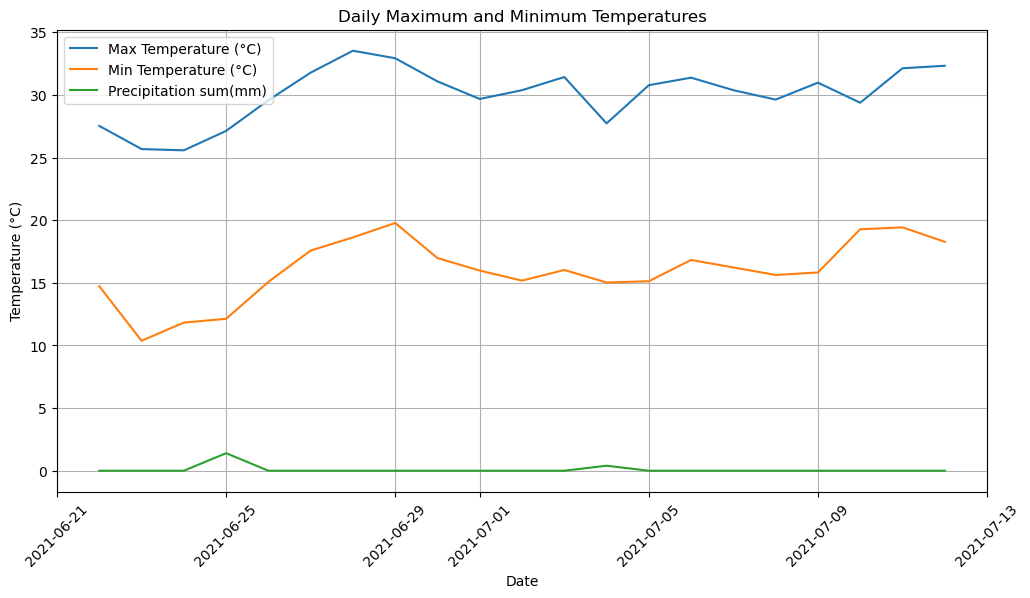

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(weather_data.iloc[:, 0],weather_data.iloc[:, 1], label="Max Temperature (°C)")
plt.plot(weather_data.iloc[:, 0],weather_data.iloc[:, 2], label="Min Temperature (°C)")
plt.plot(weather_data.iloc[:, 0],weather_data.iloc[:, 3], label="Precipitation sum(mm)")

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Maximum and Minimum Temperatures")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()